# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [68]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [69]:
def f(x):
    return x**2 * numpy.sin(x)

Ensure your function works with numpy arrays:

In [70]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [71]:
def g(x):
    return 2*x*numpy.sin(x)-(x**2-2)*numpy.cos(x) -2
    
    

Check your solution with the same numpy array:

In [72]:
assert g(0) == 0.

In [73]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [74]:
def integrate_analytic(xmin, xmax):
    return g(xmax)-g(xmin)

Check your analytic function:

In [75]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [76]:
def integrate_numeric(xmin, xmax, N):
    dx=((xmax-xmin)/N)
    
    A= numpy.arange(1,N)
    B= xmin + A*dx
    C= f(B)
    D= 2*numpy.sum(C)
    
    E= numpy.arange(0,N)
    F= xmin + (E+0.5)*dx
    G= f(F)
    H= 4*numpy.sum(G)
    
    return (dx/6)*(f(xmax) + f(xmin) + D + H)
    

Make sure you have implemented Simpson's rule correctly:

In [77]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [78]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0,0.5,'log(difference between analytical and numerical results)')

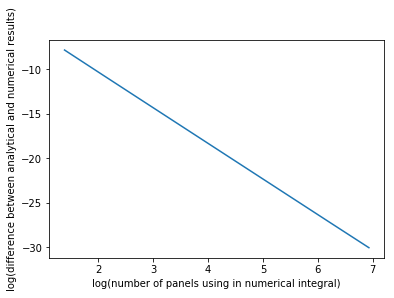

In [101]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
Z=[integrate_numeric(x0,x1,4), integrate_numeric(x0,x1,8), integrate_numeric(x0,x1,16), integrate_numeric(x0,x1,32), integrate_numeric(x0,x1,64), integrate_numeric(x0,x1,128), integrate_numeric(x0,x1,256), integrate_numeric(x0,x1,512), integrate_numeric(x0,x1,1024)]
y=result_analytic - Z
n=[4, 8, 16, 32, 64, 128, 256, 512, 1024]
plt.plot(numpy.log(n), numpy.log(y))
plt.xlabel('log(number of panels using in numerical integral)')
plt.ylabel('log(difference between analytical and numerical results)')

                                                       

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As we increase the number of panels used in the numerical integral, we greatly increase the accuracy of the numerical method. Once we start using higher order numbers for panels, such as past 10**4, we start getting fluctuations in the accuracy of the simpson method. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

If we were to use the trapezium rule, the panel count would make the accuracy more accurate until much larger numbers, around the order of 10**6.